In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os
import csv


In [2]:
## creates file path for raw data
cleaned_data_file_path = os.path.join('raw_data', 'team_game_level_data.csv')

In [3]:
## create a team-game level dataframe
## includes original statistics, a game id, a  flag for win-loss, and a seed matchup id
team_game_df = pd.read_csv(cleaned_data_file_path)
team_game_df    

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav
5,2,1985-03-14,Round of 64,East,12,Old Dominion,68,5,Southern Methodist,85,NaN,-17,0,5_12_dog
6,3,1985-03-14,Round of 64,East,9,Virginia Tech,57,8,Temple,60,NaN,-3,0,8_9_dog
7,3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN,3,1,8_9_fav
8,4,1985-03-14,Round of 64,Midwest,16,North Carolina A&T,83,1,Oklahoma,96,NaN,-13,0,1_16_dog
9,4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN,13,1,1_16_fav


In [4]:
split_date = team_game_df["date"].str.split("-")
count = 0
for row in split_date:
    team_game_df.at[count,'year'] = row[0]
    count += 1
team_game_df

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id,year
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav,1985
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog,1985
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav,1985
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog,1985
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav,1985
5,2,1985-03-14,Round of 64,East,12,Old Dominion,68,5,Southern Methodist,85,NaN,-17,0,5_12_dog,1985
6,3,1985-03-14,Round of 64,East,9,Virginia Tech,57,8,Temple,60,NaN,-3,0,8_9_dog,1985
7,3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN,3,1,8_9_fav,1985
8,4,1985-03-14,Round of 64,Midwest,16,North Carolina A&T,83,1,Oklahoma,96,NaN,-13,0,1_16_dog,1985
9,4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN,13,1,1_16_fav,1985


In [5]:
historical_num_wins_by_seed_path = os.path.join('raw_data','seed_summaries.csv')
historical_num_wins_by_seed = pd.read_csv(historical_num_wins_by_seed_path,index_col=0)
historical_num_wins_by_seed

,Average Point Spread,Average Wins,Wins by Round
Seed,,,
1,11.392193,3.351562,round\nElite Eight 52\nNational ...
2,7.109302,2.398438,round\nElite Eight 28\nNational ...
3,4.960452,1.796875,round\nElite Eight 14\nNational ...
4,3.313846,1.546875,round\nElite Eight 13\nNational ...
5,0.892593,1.109375,round\nElite Eight 6\nNational C...
6,0.335793,1.125000,round\nElite Eight 3\nNational C...
7,-0.585062,0.890625,round\nElite Eight 2\nNational C...
8,-3.281818,0.726562,round\nElite Eight 5\nNational C...
9,-4.220000,0.562500,round\nElite Eight 1\nNational Sem...


In [6]:
#Group by team to get all games played by each school in the NCAA tournament
grouped_by_team = team_game_df.groupby(by="team")

In [7]:
#calculate stats for each team and find "best" in each category
columns = ["Team",
           "Tournament Appearances",
           "Games Played",
           "Games Won",
           "Win Percentage",
           "Total Point Margin",
           "Average Point Margin",
           "Average Number of Wins",
           "Expected Wins Using Bracket",
           "Expected Games Using Bracket",
           "Expected Win % Using Bracket",
           "Win % - Expected Win % Bracket",
           "Expected Wins Using Historical Performance",
           "Expected Games Using Historical Performance",
           "Expected Win % Using Historical Performance",
           "Win % - Expected Win % Historical",
           "Performance Ratio Bracket",
           "Performance Ratio Historical"
          ]
team_performance_summary = pd.DataFrame(columns=columns)
team_count = 0
for team,group in grouped_by_team:
    tournament_appearances = group['year'].nunique()
    games_played = len(group.index)
    games_won = group["win"].sum()
    win_percentage = games_won/games_played
    total_point_margin = (group["score"]-group["opponent_score"]).sum()
    average_point_margin = total_point_margin/games_played
    average_num_wins = games_won/tournament_appearances
    
    #find the seed of team for each tournament appearance
    seeds = [int(group.loc[group.index[0],'seed'])]
    if len(group.index) > 1:
        previous_year = group.loc[group.index[0],'year']
        for index,row in group.iterrows():
            if row["year"] != previous_year:
                seeds.append(int(row['seed']))
            previous_year = row["year"]
    
    #find the number of expected wins and the expected number of games won/played for each tournament appearance based on seeding
    #add to totals
    expected_wins_bracket = 0
    expected_games_bracket = 0
    for seed in seeds:
        if (seed > 8):
            expected_games_bracket += 1
        elif (seed > 4) and (seed < 9):
            expected_wins_bracket += 1
            expected_games_bracket += 2
        elif (seed > 2) and (seed < 5):
            expected_wins_bracket += 2
            expected_games_bracket += 3
        elif (seed == 2):
            expected_wins_bracket += 3
            expected_games_bracket += 4
        elif (seed == 1):
            expected_wins_bracket += 4.75
            expected_games_bracket += 5.5
    expected_win_percentage_bracket = expected_wins_bracket/expected_games_bracket
    win_percentage_difference_bracket = win_percentage - expected_win_percentage_bracket
        
    #find the number of expected wins and the expected number of games won/played for each tournament based on historical averages
    expected_wins_historical = 0
    expected_games_historical = 0
    for seed in seeds:
        expected_wins_historical += float(historical_num_wins_by_seed.loc[int(seed),'Average Wins'])
        expected_games_historical += float(historical_num_wins_by_seed.loc[int(seed),'Average Wins']) + 1
    expected_win_percentage_historical = expected_wins_historical/expected_games_historical 
    win_percentage_difference_historical = win_percentage - expected_win_percentage_historical
    
    #each win for teams predicted to lose all games in the bracket is a 100% increase on number of games they are expected to win
    if expected_wins_bracket == 0:
        performance_ratio_bracket = games_won
    else:
        performance_ratio_bracket = games_won/expected_wins_bracket
    
    #expected_wins_historical = 0 for teams that have only been 16 seeds
    #16 seeds have never won
    if expected_wins_historical == 0:
        performace_ratio_historical = 0
    else:
        performace_ratio_historical = games_won/expected_wins_historical
        
    row_to_add = {'Team':team,
                  'Tournament Appearances':tournament_appearances,
                  'Games Played':games_played,
                  'Games Won':games_won,
                  'Win Percentage':win_percentage,
                  'Total Point Margin':total_point_margin,
                  'Average Point Margin':average_point_margin,
                  'Average Number of Wins':average_num_wins,
                  "Expected Wins Using Bracket":expected_wins_bracket,
                  "Expected Games Using Bracket":expected_games_bracket,
                  "Expected Win % Using Bracket":expected_win_percentage_bracket,
                  "Win % - Expected Win % Bracket":win_percentage_difference_bracket,
                  "Expected Wins Using Historical Performance":expected_wins_historical,
                  "Expected Games Using Historical Performance":expected_games_historical,
                  "Expected Win % Using Historical Performance":expected_win_percentage_historical,
                  "Win % - Expected Win % Historical":win_percentage_difference_historical,
                  "Performance Ratio Bracket":performance_ratio_bracket,
                  "Performance Ratio Historical":performace_ratio_historical
                 }
    team_performance_summary.loc[team_count,:] = row_to_add
    team_count +=1
team_performance_summary

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
0,Air Force,2,2,0,0,-20,-10,0,0,2,0,0,0.828125,2.82812,0.292818,-0.292818,0,0
1,Akron,4,4,0,0,-78,-19.5,0,0,4,0,0,0.914062,4.91406,0.18601,-0.18601,0,0
2,Alabama,15,33,18,0.545455,34,1.0303,1.2,16,31,0.516129,0.0293255,16.8203,31.8203,0.528603,0.0168516,1.125,1.07013
3,Alabama A&M,1,1,0,0,-10,-10,0,0,1,0,0,0,1,0,0,0,0
4,Alabama State,4,4,0,0,-93,-23.25,0,0,4,0,0,0,4,0,0,0,0
5,Albany,5,6,1,0.166667,-66,-11,0.2,0,5,0,0.166667,0.5,5.5,0.0909091,0.0757576,1,2
6,Alcorn State,2,2,0,0,-16,-8,0,0,2,0,0,0.0703125,2.07031,0.0339623,-0.0339623,0,0
7,American,3,3,0,0,-68,-22.6667,0,0,3,0,0,0.320312,3.32031,0.0964706,-0.0964706,0,0
8,Appalachian State,1,1,0,0,-26,-26,0,0,1,0,0,0.179688,1.17969,0.152318,-0.152318,0,0
9,Arizona,30,81,52,0.641975,582,7.18519,1.73333,64.5,93,0.693548,-0.0515731,54.2734,84.2734,0.644016,-0.00204064,0.806202,0.958111


In [8]:
#Most Tournament Appearances
most_appearances = team_performance_summary.sort_values(by="Tournament Appearances",ascending=False).iloc[:10,:]
most_appearances

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
65,Duke,31,116,90,0.775862,1096,9.44828,2.90323,103.75,131.5,0.788973,-0.0131113,78.6484,109.648,0.717278,0.0585838,0.86747,1.14433
113,Kansas,31,106,77,0.726415,979,9.23585,2.48387,98,126,0.777778,-0.0513627,74.4688,105.469,0.706074,0.020341,0.785714,1.03399
9,Arizona,30,81,52,0.641975,582,7.18519,1.73333,64.5,93,0.693548,-0.0515731,54.2734,84.2734,0.644016,-0.00204064,0.806202,0.958111
170,North Carolina,29,108,82,0.759259,962,8.90741,2.82759,91,117,0.777778,-0.0185185,68.6484,97.6484,0.703016,0.056243,0.901099,1.19449
116,Kentucky,27,99,75,0.757576,946,9.55556,2.77778,77.5,102,0.759804,-0.00222816,58.8594,85.8594,0.685532,0.0720435,0.967742,1.27422
144,Michigan State,26,78,53,0.679487,297,3.80769,2.03846,48.75,73.5,0.663265,0.0162219,42.0703,68.0703,0.618042,0.0614452,1.08718,1.2598
245,Syracuse,26,77,52,0.675325,424,5.50649,2,52.5,78,0.673077,0.00224775,44.125,70.125,0.629234,0.0460912,0.990476,1.17847
105,Indiana,25,59,35,0.59322,212,3.59322,1.4,44.25,68.5,0.645985,-0.0527651,37.5703,62.5703,0.600449,-0.00722916,0.79096,0.931587
249,Texas,25,54,29,0.537037,87,1.61111,1.16,28.75,53.5,0.537383,-0.000346141,28.8438,53.8438,0.535694,0.00134348,1.0087,1.00542
290,"Xavier, Ohio",24,48,24,0.5,19,0.395833,1,17,41,0.414634,0.0853659,21.1719,45.1719,0.468696,0.031304,1.41176,1.13358


In [9]:
#Most Games Won
most_wins = team_performance_summary.sort_values(by="Games Won",ascending=False).iloc[:10,:]
most_wins

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
65,Duke,31,116,90,0.775862,1096,9.44828,2.90323,103.75,131.5,0.788973,-0.0131113,78.6484,109.648,0.717278,0.0585838,0.86747,1.14433
170,North Carolina,29,108,82,0.759259,962,8.90741,2.82759,91,117,0.777778,-0.0185185,68.6484,97.6484,0.703016,0.056243,0.901099,1.19449
113,Kansas,31,106,77,0.726415,979,9.23585,2.48387,98,126,0.777778,-0.0513627,74.4688,105.469,0.706074,0.020341,0.785714,1.03399
116,Kentucky,27,99,75,0.757576,946,9.55556,2.77778,77.5,102,0.759804,-0.00222816,58.8594,85.8594,0.685532,0.0720435,0.967742,1.27422
53,Connecticut,20,71,55,0.774648,527,7.42254,2.75,48.75,67.5,0.722222,0.0524257,39.8672,59.8672,0.665927,0.108721,1.12821,1.37958
144,Michigan State,26,78,53,0.679487,297,3.80769,2.03846,48.75,73.5,0.663265,0.0162219,42.0703,68.0703,0.618042,0.0614452,1.08718,1.2598
245,Syracuse,26,77,52,0.675325,424,5.50649,2,52.5,78,0.673077,0.00224775,44.125,70.125,0.629234,0.0460912,0.990476,1.17847
9,Arizona,30,81,52,0.641975,582,7.18519,1.73333,64.5,93,0.693548,-0.0515731,54.2734,84.2734,0.644016,-0.00204064,0.806202,0.958111
128,Louisville,24,70,48,0.685714,398,5.68571,2,41.5,65,0.638462,0.0472527,35.3906,59.3906,0.595896,0.0898185,1.15663,1.35629
264,UCLA,24,67,44,0.656716,286,4.26866,1.83333,43.25,66.5,0.650376,0.00634048,36.8203,60.8203,0.605395,0.0513214,1.01734,1.19499


In [10]:
#Best Win %
best_win_percentage = team_performance_summary.sort_values(by="Win Percentage",ascending=False).iloc[:10,:]
best_win_percentage

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
65,Duke,31,116,90,0.775862,1096,9.44828,2.90323,103.75,131.5,0.788973,-0.0131113,78.6484,109.648,0.717278,0.0585838,0.86747,1.14433
53,Connecticut,20,71,55,0.774648,527,7.42254,2.75,48.75,67.5,0.722222,0.0524257,39.8672,59.8672,0.665927,0.108721,1.12821,1.37958
170,North Carolina,29,108,82,0.759259,962,8.90741,2.82759,91,117,0.777778,-0.0185185,68.6484,97.6484,0.703016,0.056243,0.901099,1.19449
116,Kentucky,27,99,75,0.757576,946,9.55556,2.77778,77.5,102,0.759804,-0.00222816,58.8594,85.8594,0.685532,0.0720435,0.967742,1.27422
113,Kansas,31,106,77,0.726415,979,9.23585,2.48387,98,126,0.777778,-0.0513627,74.4688,105.469,0.706074,0.020341,0.785714,1.03399
75,Florida,19,59,42,0.711864,402,6.81356,2.21053,33.5,52,0.644231,0.0676336,30,49,0.612245,0.0996195,1.25373,1.4
128,Louisville,24,70,48,0.685714,398,5.68571,2,41.5,65,0.638462,0.0472527,35.3906,59.3906,0.595896,0.0898185,1.15663,1.35629
143,Michigan,18,54,37,0.685185,228,4.22222,2.05556,32.5,50,0.65,0.0351852,28.6641,46.6641,0.614264,0.070921,1.13846,1.29081
144,Michigan State,26,78,53,0.679487,297,3.80769,2.03846,48.75,73.5,0.663265,0.0162219,42.0703,68.0703,0.618042,0.0614452,1.08718,1.2598
245,Syracuse,26,77,52,0.675325,424,5.50649,2,52.5,78,0.673077,0.00224775,44.125,70.125,0.629234,0.0460912,0.990476,1.17847


In [11]:
#Best Average Margin of Victory
best_average_point_margin = team_performance_summary.sort_values(by="Average Point Margin",ascending=False).iloc[:10,:]
best_average_point_margin

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
116,Kentucky,27,99,75,0.757576,946,9.55556,2.77778,77.5,102,0.759804,-0.00222816,58.8594,85.8594,0.685532,0.0720435,0.967742,1.27422
65,Duke,31,116,90,0.775862,1096,9.44828,2.90323,103.75,131.5,0.788973,-0.0131113,78.6484,109.648,0.717278,0.0585838,0.86747,1.14433
113,Kansas,31,106,77,0.726415,979,9.23585,2.48387,98,126,0.777778,-0.0513627,74.4688,105.469,0.706074,0.020341,0.785714,1.03399
170,North Carolina,29,108,82,0.759259,962,8.90741,2.82759,91,117,0.777778,-0.0185185,68.6484,97.6484,0.703016,0.056243,0.901099,1.19449
53,Connecticut,20,71,55,0.774648,527,7.42254,2.75,48.75,67.5,0.722222,0.0524257,39.8672,59.8672,0.665927,0.108721,1.12821,1.37958
9,Arizona,30,81,52,0.641975,582,7.18519,1.73333,64.5,93,0.693548,-0.0515731,54.2734,84.2734,0.644016,-0.00204064,0.806202,0.958111
75,Florida,19,59,42,0.711864,402,6.81356,2.21053,33.5,52,0.644231,0.0676336,30,49,0.612245,0.0996195,1.25373,1.4
278,Washington State,3,6,3,0.5,39,6.5,1,5,8,0.625,-0.125,4.07031,7.07031,0.575691,-0.0756906,0.6,0.737044
128,Louisville,24,70,48,0.685714,398,5.68571,2,41.5,65,0.638462,0.0472527,35.3906,59.3906,0.595896,0.0898185,1.15663,1.35629
245,Syracuse,26,77,52,0.675325,424,5.50649,2,52.5,78,0.673077,0.00224775,44.125,70.125,0.629234,0.0460912,0.990476,1.17847


In [12]:
#Most Average Number of Wins Per Year
most_average_num_wins = team_performance_summary.sort_values(by="Average Number of Wins",ascending=False).iloc[:10,:]
most_average_num_wins

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
65,Duke,31,116,90,0.775862,1096,9.44828,2.90323,103.75,131.5,0.788973,-0.0131113,78.6484,109.648,0.717278,0.0585838,0.86747,1.14433
170,North Carolina,29,108,82,0.759259,962,8.90741,2.82759,91,117,0.777778,-0.0185185,68.6484,97.6484,0.703016,0.056243,0.901099,1.19449
116,Kentucky,27,99,75,0.757576,946,9.55556,2.77778,77.5,102,0.759804,-0.00222816,58.8594,85.8594,0.685532,0.0720435,0.967742,1.27422
53,Connecticut,20,71,55,0.774648,527,7.42254,2.75,48.75,67.5,0.722222,0.0524257,39.8672,59.8672,0.665927,0.108721,1.12821,1.37958
113,Kansas,31,106,77,0.726415,979,9.23585,2.48387,98,126,0.777778,-0.0513627,74.4688,105.469,0.706074,0.020341,0.785714,1.03399
75,Florida,19,59,42,0.711864,402,6.81356,2.21053,33.5,52,0.644231,0.0676336,30,49,0.612245,0.0996195,1.25373,1.4
143,Michigan,18,54,37,0.685185,228,4.22222,2.05556,32.5,50,0.65,0.0351852,28.6641,46.6641,0.614264,0.070921,1.13846,1.29081
144,Michigan State,26,78,53,0.679487,297,3.80769,2.03846,48.75,73.5,0.663265,0.0162219,42.0703,68.0703,0.618042,0.0614452,1.08718,1.2598
245,Syracuse,26,77,52,0.675325,424,5.50649,2,52.5,78,0.673077,0.00224775,44.125,70.125,0.629234,0.0460912,0.990476,1.17847
128,Louisville,24,70,48,0.685714,398,5.68571,2,41.5,65,0.638462,0.0472527,35.3906,59.3906,0.595896,0.0898185,1.15663,1.35629


In [13]:
#Best Expected Win % Difference Using Bracket
best_expected_win_percentage_bracket = team_performance_summary.sort_values(by="Win % - Expected Win % Bracket",ascending=False).iloc[:10,:]
best_expected_win_percentage_bracket

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
78,Florida Gulf Coast,2,5,3,0.6,23,4.6,1.5,0,2,0,0.6,0.0703125,2.07031,0.0339623,0.566038,3,42.6667
48,Cleveland State,2,5,3,0.6,10,2,1.5,0,2,0,0.6,0.429688,2.42969,0.176849,0.423151,3,6.98182
129,Loyola Marymount,3,7,4,0.571429,-16,-2.28571,1.33333,0,3,0,0.571429,1.74219,4.74219,0.367381,0.204048,4,2.29596
291,Yale,1,2,1,0.5,-3,-1.5,1,0,1,0,0.5,0.523438,1.52344,0.34359,0.15641,1,1.91045
14,Arkansas-Pine Bluff,1,2,1,0.5,-12,-6,1,0,1,0,0.5,0,1,0,0.5,1,0
261,Tulane,3,6,3,0.5,-57,-9.5,1,0,3,0,0.5,1.78125,4.78125,0.372549,0.127451,3,1.68421
169,Norfolk State,1,2,1,0.5,-32,-16,1,0,1,0,0.5,0.0703125,1.07031,0.0656934,0.434307,1,14.2222
156,Morehead State,2,4,2,0.5,-21,-5.25,1,0,2,0,0.5,0.25,2.25,0.111111,0.388889,2,8
30,Cal Poly,1,2,1,0.5,-15,-7.5,1,0,1,0,0.5,0,1,0,0.5,1,0
115,Kent State,5,9,4,0.444444,-40,-4.44444,0.8,0,5,0,0.444444,2.55469,7.55469,0.338159,0.106285,4,1.56575


In [14]:
#Best Expected Win % Using Historical Performance of Seeds
best_expected_win_percentage_historical = team_performance_summary.sort_values(by="Win % - Expected Win % Historical",ascending=False).iloc[:10,:]
best_expected_win_percentage_historical

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
78,Florida Gulf Coast,2,5,3,0.6,23,4.6,1.5,0,2,0,0.6,0.0703125,2.07031,0.0339623,0.566038,3,42.6667
30,Cal Poly,1,2,1,0.5,-15,-7.5,1,0,1,0,0.5,0,1,0,0.5,1,0
14,Arkansas-Pine Bluff,1,2,1,0.5,-12,-6,1,0,1,0,0.5,0,1,0,0.5,1,0
169,Norfolk State,1,2,1,0.5,-32,-16,1,0,1,0,0.5,0.0703125,1.07031,0.0656934,0.434307,1,14.2222
48,Cleveland State,2,5,3,0.6,10,2,1.5,0,2,0,0.6,0.429688,2.42969,0.176849,0.423151,3,6.98182
156,Morehead State,2,4,2,0.5,-21,-5.25,1,0,2,0,0.5,0.25,2.25,0.111111,0.388889,2,8
174,North Carolina-Asheville,4,6,2,0.333333,-69,-11.5,0.5,0,4,0,0.333333,0.0703125,4.07031,0.0172745,0.316059,2,28.4444
185,Northwestern State,3,5,2,0.4,-82,-16.4,0.666667,0,3,0,0.4,0.359375,3.35938,0.106977,0.293023,2,5.56522
112,James Madison,2,3,1,0.333333,-10,-3.33333,0.5,0,2,0,0.333333,0.179688,2.17969,0.0824373,0.250896,1,5.56522
167,Niagara,2,3,1,0.333333,-49,-16.3333,0.5,0,2,0,0.333333,0.179688,2.17969,0.0824373,0.250896,1,5.56522


In [15]:
#best performance ratio bracket
best_performance_ratio_bracket = team_performance_summary.sort_values(by="Performance Ratio Bracket",ascending=False).iloc[:10,:]
best_performance_ratio_bracket

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
209,Richmond,8,14,6,0.428571,-101,-7.21429,0.75,1,9,0.111111,0.31746,3.25,11.25,0.288889,0.139683,6,1.84615
83,George Mason,6,11,5,0.454545,-77,-7,0.833333,1,7,0.142857,0.311688,2.25781,8.25781,0.273415,0.18113,5,2.21453
184,Northern Iowa,8,13,5,0.384615,-19,-1.46154,0.625,1,9,0.111111,0.273504,4.35156,12.3516,0.352309,0.0323067,5,1.14901
84,George Washington,9,13,4,0.307692,-88,-6.76923,0.444444,1,10,0.1,0.207692,5.27344,14.2734,0.369458,-0.0617658,4,0.758519
115,Kent State,5,9,4,0.444444,-40,-4.44444,0.8,0,5,0,0.444444,2.55469,7.55469,0.338159,0.106285,4,1.56575
129,Loyola Marymount,3,7,4,0.571429,-16,-2.28571,1.33333,0,3,0,0.571429,1.74219,4.74219,0.367381,0.204048,4,2.29596
221,Siena,6,10,4,0.4,-40,-4,0.666667,0,6,0,0.4,1.49219,7.49219,0.199166,0.200834,4,2.68063
29,Butler,13,32,19,0.59375,32,1,1.46154,6,19,0.315789,0.277961,9.32812,22.3281,0.417775,0.175975,3.16667,2.03685
48,Cleveland State,2,5,3,0.6,10,2,1.5,0,2,0,0.6,0.429688,2.42969,0.176849,0.423151,3,6.98182
78,Florida Gulf Coast,2,5,3,0.6,23,4.6,1.5,0,2,0,0.6,0.0703125,2.07031,0.0339623,0.566038,3,42.6667


In [16]:
#best performance ratio historical
best_performance_ratio_historical = team_performance_summary.sort_values(by="Performance Ratio Historical",ascending=False).iloc[:10,:]
best_performance_ratio_historical

,Team,Tournament Appearances,Games Played,Games Won,Win Percentage,Total Point Margin,Average Point Margin,Average Number of Wins,Expected Wins Using Bracket,Expected Games Using Bracket,Expected Win % Using Bracket,Win % - Expected Win % Bracket,Expected Wins Using Historical Performance,Expected Games Using Historical Performance,Expected Win % Using Historical Performance,Win % - Expected Win % Historical,Performance Ratio Bracket,Performance Ratio Historical
78,Florida Gulf Coast,2,5,3,0.6,23,4.6,1.5,0,2,0,0.6,0.0703125,2.07031,0.0339623,0.566038,3,42.6667
174,North Carolina-Asheville,4,6,2,0.333333,-69,-11.5,0.5,0,4,0,0.333333,0.0703125,4.07031,0.0172745,0.316059,2,28.4444
169,Norfolk State,1,2,1,0.5,-32,-16,1,0,1,0,0.5,0.0703125,1.07031,0.0656934,0.434307,1,14.2222
92,Hampton,6,8,2,0.25,-142,-17.75,0.333333,0,6,0,0.25,0.140625,6.14062,0.0229008,0.227099,2,14.2222
120,Lehigh,5,6,1,0.166667,-77,-12.8333,0.2,0,5,0,0.166667,0.0703125,5.07031,0.0138675,0.152799,1,14.2222
156,Morehead State,2,4,2,0.5,-21,-5.25,1,0,2,0,0.5,0.25,2.25,0.111111,0.388889,2,8
48,Cleveland State,2,5,3,0.6,10,2,1.5,0,2,0,0.6,0.429688,2.42969,0.176849,0.423151,3,6.98182
270,Vermont,5,7,2,0.285714,-84,-12,0.4,0,5,0,0.285714,0.320312,5.32031,0.0602056,0.225509,2,6.2439
185,Northwestern State,3,5,2,0.4,-82,-16.4,0.666667,0,3,0,0.4,0.359375,3.35938,0.106977,0.293023,2,5.56522
258,Texas-San Antonio,4,5,1,0.2,-80,-16,0.25,0,4,0,0.2,0.179688,4.17969,0.0429907,0.157009,1,5.56522


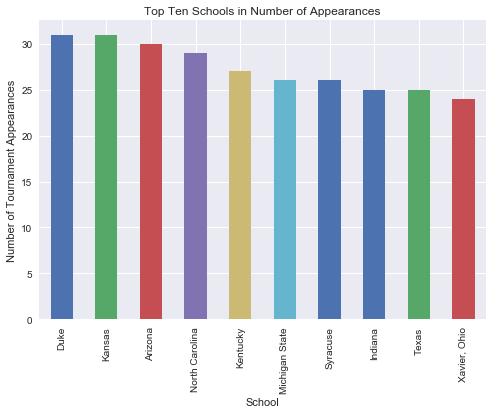

In [17]:
#create plots
#Top Teams # of Appearances
x = np.arange(len(most_appearances.index))
most_appearances["Tournament Appearances"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(most_appearances['Team']))
plt.xlabel('School')
plt.ylabel("Number of Tournament Appearances")
plt.title("Top Ten Schools in Number of Appearances")
plt.show()

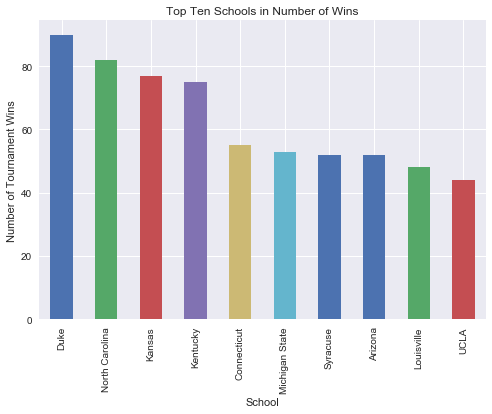

In [18]:
#Top Teams # of Wins
x = np.arange(len(most_wins.index))
most_wins["Games Won"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(most_wins['Team']))
plt.xlabel('School')
plt.ylabel("Number of Tournament Wins")
plt.title("Top Ten Schools in Number of Wins")
plt.show()

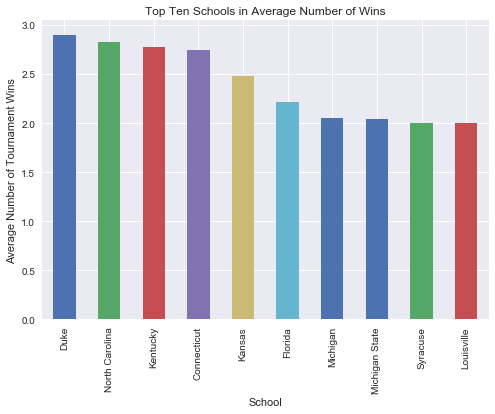

In [19]:
#Top Teams Average # of Wins
x = np.arange(len(most_average_num_wins.index))
most_average_num_wins["Average Number of Wins"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(most_average_num_wins['Team']))
plt.xlabel('School')
plt.ylabel("Average Number of Tournament Wins")
plt.title("Top Ten Schools in Average Number of Wins")
plt.show()

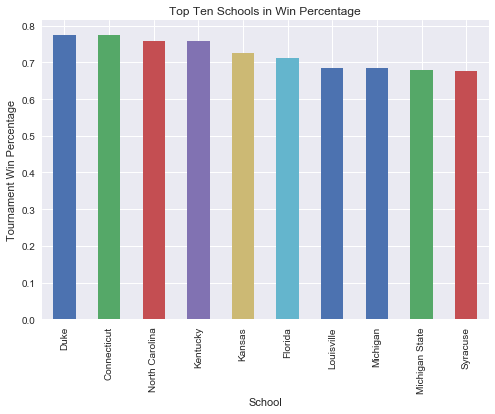

In [20]:
#Top Teams Win %
x = np.arange(len(best_win_percentage.index))
best_win_percentage["Win Percentage"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(best_win_percentage['Team']))
plt.xlabel('School')
plt.ylabel("Tournament Win Percentage")
plt.title("Top Ten Schools in Win Percentage")
plt.show()

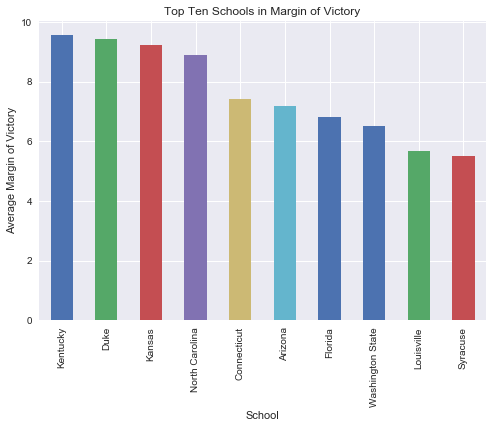

In [21]:
#Top Teams Average Win Margin
x = np.arange(len(best_average_point_margin.index))
best_average_point_margin["Average Point Margin"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(best_average_point_margin['Team']))
plt.xlabel('School')
plt.ylabel("Average Margin of Victory")
plt.title("Top Ten Schools in Margin of Victory")
plt.show()

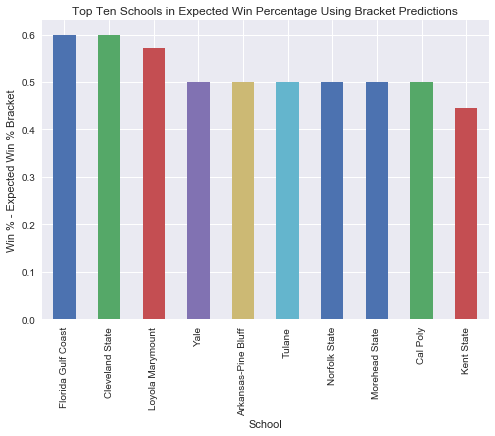

In [22]:
#Top Teams Wins vs. Expectation (who overperforms seeds?)
x = np.arange(len(best_expected_win_percentage_bracket.index))
best_expected_win_percentage_bracket["Win % - Expected Win % Bracket"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(best_expected_win_percentage_bracket['Team']))
plt.xlabel('School')
plt.ylabel("Win % - Expected Win % Bracket")
plt.title("Top Ten Schools in Expected Win Percentage Using Bracket Predictions")
plt.show()

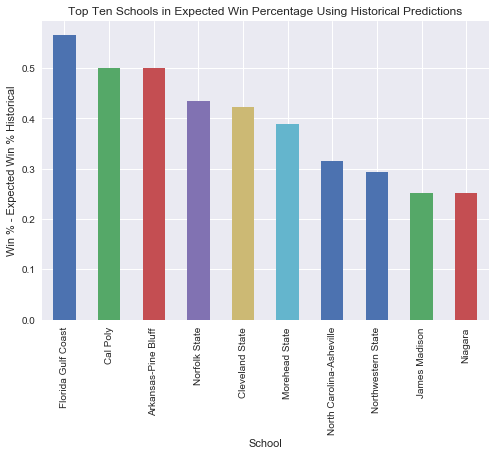

In [23]:
#Top Teams Wins vs. Expectation (who overperforms seeds?)
x = np.arange(len(best_expected_win_percentage_historical.index))
best_expected_win_percentage_historical["Win % - Expected Win % Historical"].plot(x=x,kind='Bar',grid='on')
plt.xticks(x,list(best_expected_win_percentage_historical['Team']))
plt.xlabel('School')
plt.ylabel("Win % - Expected Win % Historical")
plt.title("Top Ten Schools in Expected Win Percentage Using Historical Predictions")
plt.show()

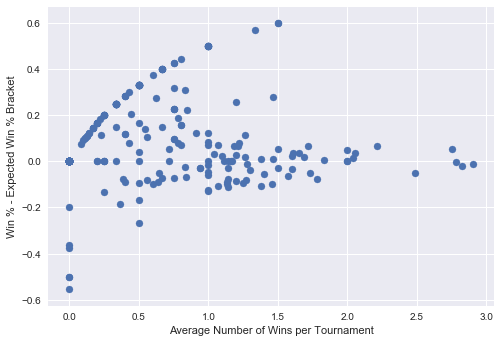

In [24]:
plt.scatter(team_performance_summary.loc[:,'Average Number of Wins'],team_performance_summary.loc[:,"Win % - Expected Win % Bracket"])
plt.xlabel('Average Number of Wins per Tournament')
plt.ylabel('Win % - Expected Win % Bracket')
plt.show()

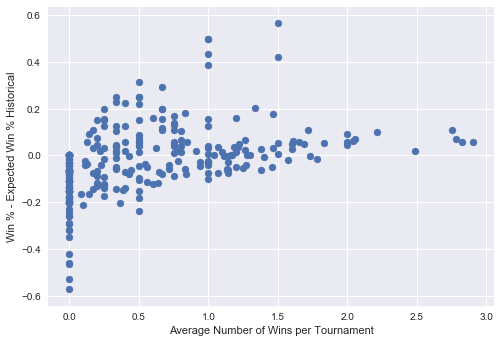

In [25]:
plt.scatter(team_performance_summary.loc[:,'Average Number of Wins'],team_performance_summary.loc[:,"Win % - Expected Win % Historical"])
plt.xlabel('Average Number of Wins per Tournament')
plt.ylabel('Win % - Expected Win % Historical')
plt.show()

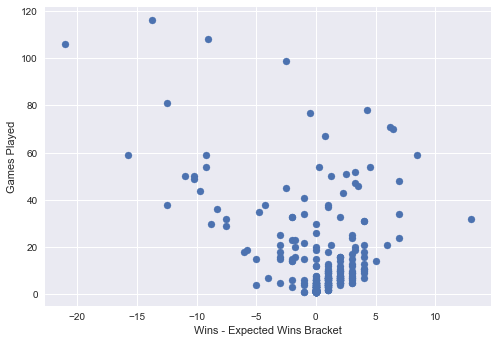

In [26]:
win_difference = team_performance_summary.loc[:,'Games Won'] - team_performance_summary.loc[:,'Expected Wins Using Bracket']
plt.scatter(win_difference,team_performance_summary.loc[:,'Games Played'])
plt.xlabel("Wins - Expected Wins Bracket")
plt.ylabel("Games Played")
plt.show()

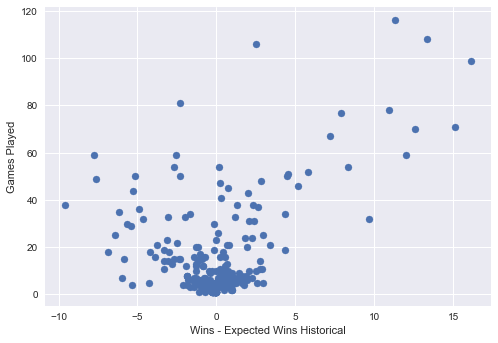

In [27]:
win_difference = team_performance_summary.loc[:,'Games Won'] - team_performance_summary.loc[:,'Expected Wins Using Historical Performance']
plt.scatter(win_difference,team_performance_summary.loc[:,'Games Played'])
plt.xlabel("Wins - Expected Wins Historical")
plt.ylabel("Games Played")
plt.show()

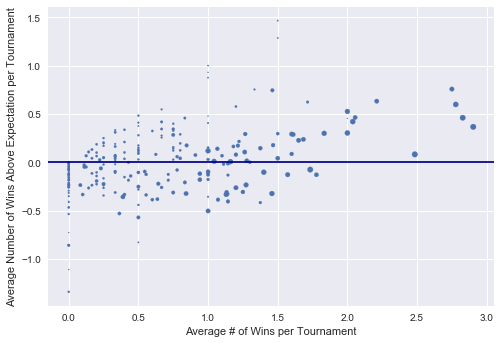

In [38]:
win_difference_average = (team_performance_summary.loc[:,'Games Won'] - team_performance_summary.loc[:,'Expected Wins Using Historical Performance'])/team_performance_summary.loc[:,'Tournament Appearances']
plt.scatter(team_performance_summary.loc[:,'Average Number of Wins'],win_difference_average,s=team_performance_summary.loc[:,'Tournament Appearances'].astype('float'))
plt.xlabel("Average # of Wins per Tournament")
plt.ylabel("Average Number of Wins Above Expectation per Tournament")
plt.axhline(y=0,color='darkblue')
plt.show()

In [29]:
#create function to summarize team's historical performance
team = "Air Force"
group = grouped_by_team.get_group(team)
columns = ["Team","Tournament Appearances","Games Played","Games Won","Expected Wins","Win Percentage","Expected Win Percentage","Point Margin","Average Point Margin","Average Number of Wins"]
team_performance_summary_individual = pd.DataFrame(columns=columns)

tournament_appearances = group['year'].nunique()
games_played = len(group.index)
games_won = group["win"].sum()
total_point_margin = (group["score"]-group["opponent_score"]).sum()
average_point_margin = total_point_margin/games_played
average_num_wins = games_won/tournament_appearances
    
#if else for expected wins (use number of wins expected for that seed. 1s get extra 0.25 for championship game?)
############################################################################################################################
seeds = [int(group.loc[group.index[0],'seed'])]
if len(group.index) > 1:
    previous_year = group.loc[group.index[0],'year']
    for index,row in group.iterrows():
        if row["year"] != previous_year:
            seeds.append(int(row['seed']))
        previous_year = row["year"]
        expected_wins = 0
for seed in seeds:
    if (seed > 4) and (seed < 9):
        expected_wins += 1
    elif (seed > 2) and (seed < 5):
        expected_wins += 2
    elif (seed == 2):
        expected_wins += 3
    elif (seed == 1):
        expected_wins += 4.25
win_percentage = games_won/games_played
if expected_wins == 0:
    expected_win_percentage = games_won
else:
    expected_win_percentage = games_won/expected_wins
row_to_add = {'Team':team,
              'Tournament Appearances':tournament_appearances,
              'Games Played':games_played,
              'Games Won':games_won,
              'Expected Wins':expected_wins,
              'Win Percentage':win_percentage,
              'Expected Win Percentage':expected_win_percentage,
              'Point Margin':total_point_margin,
              'Average Point Margin':average_point_margin,
              'Average Number of Wins':average_num_wins
             }
team_performance_summary_individual.loc[team_count,:] = row_to_add
team_count +=1
team_performance_summary_individual

,Team,Tournament Appearances,Games Played,Games Won,Expected Wins,Win Percentage,Expected Win Percentage,Point Margin,Average Point Margin,Average Number of Wins
292,Air Force,2,2,0,0,0,0,-20,-10,0
